## Construindo uma Rede Neural do Zero

Para ter um melhor entendimento de como funciona, vamos construir uma rede neural do zero para classificar números escritos a mão.  
Não vamos utilizar bibliotecas de redes neurais ou qualquer inteligência artificial, vamos construir tudo utilizando apenas bibliotecas de álgebra linear e cálculo.  
Para treino e teste do modelo, será utilizado o [MNIST](https://en.wikipedia.org/wiki/MNIST_database), que é um dataset de imagens de números escritos a mão bastante conhecido.  
O dataset possui 70.000 imagens. Cada imagem possui tamanho 28x28 pixels.

Como cada imagem possui tamanho 28x28 pixels, podemos representar cada imagem como um vetor de tamanho 784 (28x28).  
Sendo assim, o input da nossa rede neural será um vetor de tamanho 784.  
Como queremos classificar os números de 0 a 9, o output da nossa rede neural será um vetor de tamanho 10.  
  
Vamos construir duas camadas com 10 neurônios cada para processar o input e gerar o output.  
  
Deve ficar parecido com isso:

<img src="rede.png" style="width: 600px; height: auto;">

In [48]:
# Importando as bibliotecas necessárias
import numpy as np  # Biblioteca para trabalhar com vetores e matrizes
import pandas as pd  # Biblioteca para trabalhar com dataframes
from matplotlib import pyplot as plt  # Biblioteca para plotar gráficos

In [49]:
# Importando o dataset
data = pd.read_csv('mnist.csv')  # Lendo o dataset
data.head()  # Visualizando as 5 primeiras linhas do dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data.shape  # Visualizando a quantidade de linhas e colunas do dataset

(70000, 785)

O dataset possui 70 mil linhas e 785 colunas. A primeira coluna é o label da imagem e as outras 784 colunas são os pixels da imagem.

## Preparando os dados para treino e teste:

Os dados precisam ser tratados e transformaddos em Arrays NumPy para que possam ser utilizados no treinamento da rede neural.

In [51]:
data = np.array(data)       # converte para array numpy
m, n = data.shape           # m = 10000 amostras, n = 785 colunas
np.random.shuffle(data)     # mistura as linhas do dataset

data_dev = data[0:1000].T   # 1000 amostras para validação
Y_dev = data_dev[0]         # rótulos
X_dev = data_dev[1:n]       # dados
X_dev = X_dev / 255.        # normalização

data_train = data[1000:m].T # 9000 amostras para treinamento
Y_train = data_train[0]     # rótulos
X_train = data_train[1:n]   # dados
X_train = X_train / 255.    # normalização
_,m_train = X_train.shape   # m_train = 9000 amostras

In [52]:
Y_train

array([7, 4, 9, ..., 1, 5, 0], dtype=int64)

Parece certo.

## Definindo a arquitetura da rede neural:

In [53]:
# Definindo os parâmetros iniciais
def init_params():
    '''
    Inicializa os parâmetros W1, b1, W2, b2
    Onde:
        W1: matriz de pesos da camada 1
        b1: vetor de bias da camada 1
        W2: matriz de pesos da camada 2
        b2: vetor de bias da camada 2
    '''
    W1 = np.random.rand(10, 784) - 0.5  # 10 neurônios na camada de saída, 784 neurônios na camada de entrada
    b1 = np.random.rand(10, 1) - 0.5    # 10 neurônios na camada de saída
    W2 = np.random.rand(10, 10) - 0.5   # 10 neurônios na camada de saída, 10 neurônios na camada de entrada
    b2 = np.random.rand(10, 1) - 0.5    # 10 neurônios na camada de saída
    return W1, b1, W2, b2


# Definindo o ReLU: função de ativação
def ReLU(Z):
    '''
    Implementa a função de ativação ReLU
    A ativação ReLU serve para adicionar não-linearidade à rede
    '''
    return np.maximum(Z, 0)  # retorna o valor de Z se for maior que 0, caso contrário retorna 0


# Definindo a função de ativação Softmax
def softmax(Z):
    '''
    Implementa a função de ativação Softmax
    A ativação Softmax é utilizada para classificação multiclasse
    Ela retorna probabilidades para cada classe
    '''
    A = np.exp(Z) / sum(np.exp(Z))  # np.exp() calcula o exponencial de cada elemento de Z
    return A


# Definindo a propagação para frente
def forward_prop(W1, b1, W2, b2, X):
    '''
    Implementa a propagação para frente
    Retorna:
        Z1: vetor de saída da camada 1
        A1: vetor de ativação da camada 1
        Z2: vetor de saída da camada 2
        A2: vetor de ativação da camada 2
    '''
    Z1 = W1.dot(X) + b1     # np.dot() calcula o produto escalar entre W1 e X
    A1 = ReLU(Z1)           # A1 é a ativação de Z1
    Z2 = W2.dot(A1) + b2    # np.dot() calcula o produto escalar entre W2 e A1
    A2 = softmax(Z2)        # A2 é a ativação de Z2
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):  # Derivada da função ReLU
    return Z > 0    # Retorna 1 se Z > 0, caso contrário retorna 0


# Definindo o one-hot encoding: transforma os valores de y em vetores de 0 e 1
def one_hot(Y):
    '''
    Implementa o one-hot encoding
    One-hot encoding é utilizado para transformar os valores de y em vetores de 0 e 1
    '''
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Cria uma matriz de zeros
    one_hot_Y[np.arange(Y.size), Y] = 1         # Substitui os zeros por 1
    one_hot_Y = one_hot_Y.T                     # Transpõe a matriz
    return one_hot_Y


# Definindo a propagação para trás
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    '''
    Implementa a propagação para trás
    Retorna:
        dW1: gradiente de W1
        db1: gradiente de b1
        dW2: gradiente de W2
        db2: gradiente de b2
    '''
    one_hot_Y = one_hot(Y)                  # Transforma os valores de Y em vetores de 0 e 1
    dZ2 = A2 - one_hot_Y                    # Calcula a derivada de Z2
    dW2 = 1 / m * dZ2.dot(A1.T)             # Calcula a derivada de W2
    db2 = 1 / m * np.sum(dZ2)               # Calcula a derivada de b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)    # Calcula a derivada de Z1
    dW1 = 1 / m * dZ1.dot(X.T)              # Calcula a derivada de W1
    db1 = 1 / m * np.sum(dZ1)               # Calcula a derivada de b1
    return dW1, db1, dW2, db2


# Definindo a atualização dos parâmetros
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    '''
    Implementa a atualização dos parâmetros
    Onde:
        alpha: taxa de aprendizado
    '''
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [54]:
# Definindo a função de predição
def get_predictions(A2):
    return np.argmax(A2, 0)  # Retorna o índice do maior valor de A2


# Definindo a função de acurácia
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size  # Retorna a acurácia


# Definindo o algoritmo de treinamento
def gradient_descent(X, Y, alpha, iterations):
    '''
    Implementa o algoritmo de treinamento
    Onde:
        alpha: taxa de aprendizado
        iterations: número de iterações
    '''
    W1, b1, W2, b2 = init_params()  # Inicializa os parâmetros
    for i in range(iterations):     # Loop pelas iterações
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)                            # Propagação para frente
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)            # Propagação para trás
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)   # Atualiza os parâmetros
        if i % 10 == 0:                          # A cada 10 iterações
            print("Iteration: ", i)              # Printa a iteração
            predictions = get_predictions(A2)    # Faz a predição
            print(get_accuracy(predictions, Y))  # Printa a acurácia
    return W1, b1, W2, b2

## Treinando a rede neural:

In [55]:
# Treinando a rede
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 1 1 ... 1 9 1] [7 4 9 ... 1 5 0]
0.07934782608695652
Iteration:  10
[2 8 8 ... 1 9 6] [7 4 9 ... 1 5 0]
0.1804927536231884
Iteration:  20
[2 8 8 ... 3 9 6] [7 4 9 ... 1 5 0]
0.2361304347826087
Iteration:  30
[1 8 8 ... 3 5 6] [7 4 9 ... 1 5 0]
0.27107246376811595
Iteration:  40
[1 8 8 ... 1 5 6] [7 4 9 ... 1 5 0]
0.30871014492753623
Iteration:  50
[1 8 8 ... 1 5 6] [7 4 9 ... 1 5 0]
0.35879710144927535
Iteration:  60
[1 7 8 ... 1 3 0] [7 4 9 ... 1 5 0]
0.4256376811594203
Iteration:  70
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.4706666666666667
Iteration:  80
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.5028550724637681
Iteration:  90
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.5331739130434783
Iteration:  100
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.558768115942029
Iteration:  110
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.5818260869565217
Iteration:  120
[1 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.6019565217391304
Iteration:  130
[7 7 9 ... 1 3 0] [7 4 9 ... 1 5 0]
0.6203623188405797
Iteration:  14

Após 500 épocas de treinamento, a rede neural atingiu uma acurácia superior a 80% no dataset de treino.  
Podemos melhorar a acurácia da rede neural aumentando o número de épocas de treinamento, alterando a arquitetura da rede neural, alterando a taxa de aprendizado, etc.  
Mas esse modelo simples serve para demonstrar como uma rede neural funciona.

## Fazendo as previsões:

In [56]:
# Fazendo predições
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)  # Propagação para frente
    predictions = get_predictions(A2)
    return predictions

# Testando a rede
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]  # Seleciona uma imagem do dataset
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)  # Faz a predição
    label = Y_train[index]             # Seleciona o rótulo da imagem
    print("Prediction: ", prediction)  # Printa a predição
    print("Label: ", label)            # Printa o rótulo
    
    current_image = current_image.reshape((28, 28)) * 255  # Reshape da imagem
    plt.gray()                                             # Define o esquema de cores
    plt.imshow(current_image, interpolation='nearest')     # Plota a imagem
    plt.show()

Fazedo alguns testes...

Prediction:  [7]
Label:  7


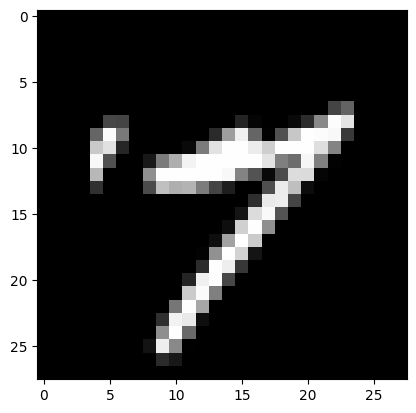

Prediction:  [4]
Label:  4


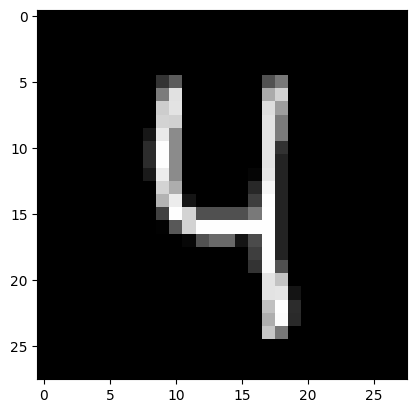

Prediction:  [9]
Label:  9


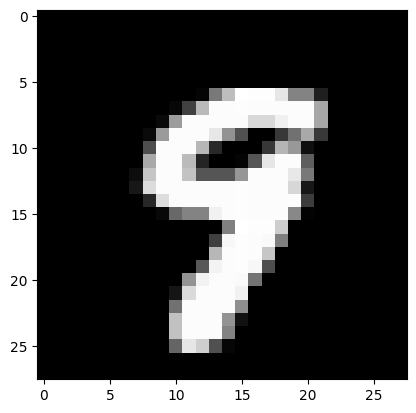

Prediction:  [1]
Label:  1


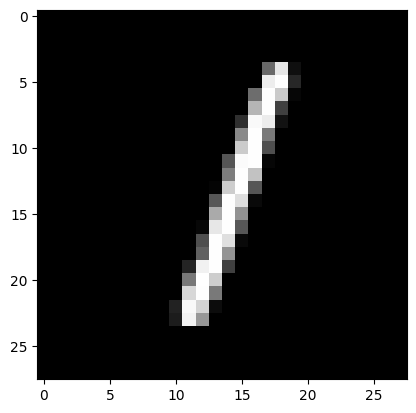

In [57]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

## Medindo a acurácia do modelo nos dados de teste:

In [58]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 3 7 6 6 1 5 9 8 9 0 8 4 1 1 8 4 0 0 0 4 6 5 0 1 9 6 8 3 9 9 8 5 9 1 2 9
 1 9 6 5 3 7 8 2 1 0 5 5 8 9 5 1 9 7 9 7 9 0 8 8 2 0 5 1 4 7 9 7 1 6 7 0 9
 3 7 9 4 3 9 9 9 2 1 1 0 5 5 3 7 7 9 4 4 3 2 1 0 9 6 0 1 0 6 8 0 7 5 7 7 8
 6 4 2 7 2 4 7 3 3 6 6 1 0 7 1 0 4 5 9 9 7 3 1 8 5 6 5 3 6 9 3 0 7 1 4 9 3
 1 2 4 1 8 5 6 1 6 8 8 1 5 3 6 1 6 6 6 1 5 2 9 6 4 3 5 1 3 0 8 3 8 8 0 6 2
 4 6 6 6 2 8 8 9 0 5 6 0 0 1 8 1 3 1 5 5 1 8 7 1 6 2 9 9 6 9 5 2 2 7 3 8 9
 2 0 7 7 3 0 9 1 3 9 8 6 1 9 0 0 3 0 9 1 3 8 8 0 3 8 6 5 5 7 6 5 5 3 7 4 5
 1 9 0 0 4 7 4 4 3 3 6 5 7 2 8 3 8 1 7 6 8 1 4 5 9 7 5 8 1 3 1 2 2 0 6 6 1
 7 5 1 3 6 4 0 5 6 4 9 9 2 1 2 8 8 1 0 3 3 2 8 8 5 1 2 7 7 6 6 1 9 5 1 1 7
 1 3 5 6 8 6 3 5 5 7 8 4 9 2 4 7 9 5 6 2 9 7 7 1 0 7 0 6 3 7 8 0 8 0 2 4 1
 1 8 8 4 1 5 2 8 6 0 1 0 1 7 3 0 2 1 8 6 1 4 6 7 5 0 0 6 2 3 8 0 7 9 4 2 8
 5 8 9 0 9 0 9 5 0 1 5 7 2 0 1 9 6 3 3 3 6 4 8 2 3 0 8 2 2 1 3 9 3 0 6 6 5
 5 1 3 7 9 3 1 8 7 0 8 5 1 6 0 0 6 6 7 5 6 0 1 3 6 6 6 2 7 1 9 8 6 3 2 5 6
 7 7 1 0 0 7 6 6 0 6 1 0 

0.8

O modelo atingiu uma acurácia superior a 80% nos dados de teste.  
Esse valor é próximo da acurácia obtida nos dados de treino, o que indica que o modelo não está sofrendo de overfitting.

Lembrando que o modelo pode ser melhorado alterando a arquitetura da rede neural, aumentando o número de épocas de treinamento, alterando a taxa de aprendizado, etc.